In [1]:
import sys
sys.path.append('C:\\Users\\DavidB\\PycharmProjects\\My_Football_Analytics')


import pandas as pd
import numpy as np
import torch
from torch.nn.functional import softplus
import Basics.Data.Metrica_IO as mio
from Position_data.Tracking_Data import tracking_data
import Position_data.PitchControl.pitch_control

## set GPU or CPU (uncomment second line to use CPU)
# device = torch.device('cuda:0'); dtype = torch.float16
device = 'cpu'; dtype = torch.float32

In [2]:
# supposed to be based on td_object --> first create one
# everywhere we call the object now will later be self

data_dir = 'sample-data-master/data/'
game_id = 1
away = mio.tracking_data(DATADIR=data_dir, game_id=game_id, teamname='Away')
home = mio.tracking_data(DATADIR=data_dir, game_id=game_id, teamname='Home')
td = mio.merge_tracking_data(home, away)
td_object = tracking_data(td, data_source='metrica', scale_to_pitch='mplsoccer')
td_object.get_velocities()

td_object

Reading team: away
Reading team: home


In [3]:
pc= pitch_control.tensor_pitch_control(td_object, version = 'Spearman')

Running Spearman's pitch control computation based on Gauss legendre quadration
Current batch: 1/2
Current batch: 2/2


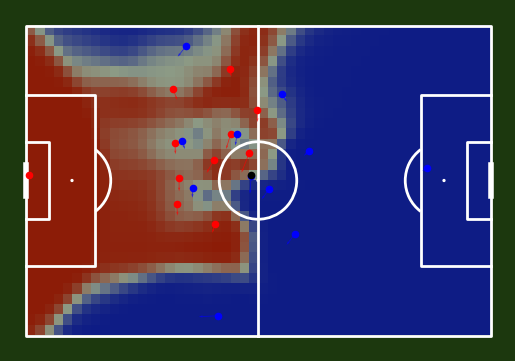

In [4]:
cmap = 'bwr'

fig, ax = td_object.plot_players(frame=100, velocities=True)
ax.imshow(np.flipud(pc[100].rot90()), extent=(
   td_object.x_range_pitch[0], td_object.x_range_pitch[1], td_object.y_range_pitch[1],
          td_object.y_range_pitch[0]), cmap=cmap, alpha=0.5, vmin=0.0, vmax=1.0)


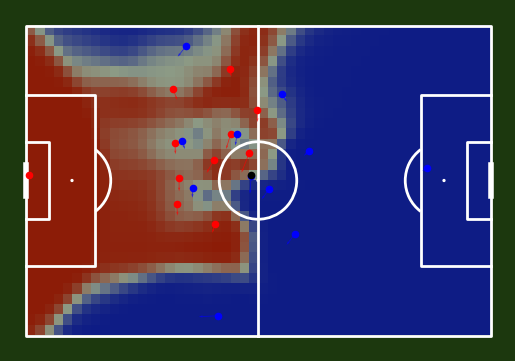

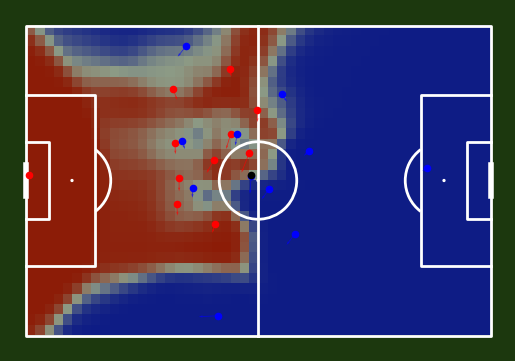

In [6]:
pitch_control.plot_tensor_pitch_control(td_object=td_object, frame=100, pitch_control=pc, version = 'Spearman')

Modelling pitch control...
Running Spearman's pitch control computation based on Gauss legendre quadration
Current batch: 1/2
Current batch: 2/2


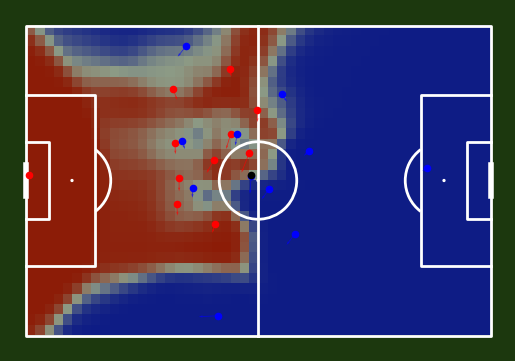

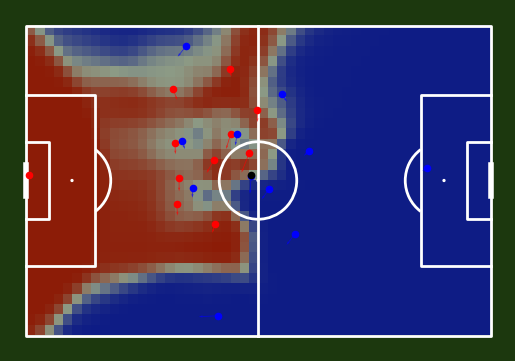

In [7]:
pitch_control.plot_tensor_pitch_control(td_object=td_object, frame=100, version = 'Spearman')

In [8]:
# supposed to be based on td_object --> first create one
# everywhere we call the object now will later be self

data_dir = 'sample-data-master/data/'
game_id = 1
away = mio.tracking_data(DATADIR=data_dir, game_id=game_id, teamname='Away')
home = mio.tracking_data(DATADIR=data_dir, game_id=game_id, teamname='Home')
td = mio.merge_tracking_data(home, away)
td_object = tracking_data(td, data_source='metrica', scale_to_pitch='myPitch')
td_object.get_velocities()

td_object

Reading team: away
Reading team: home


Modelling pitch control...
Running Spearman's pitch control computation based on Gauss legendre quadration
Current batch: 1/2
Current batch: 2/2


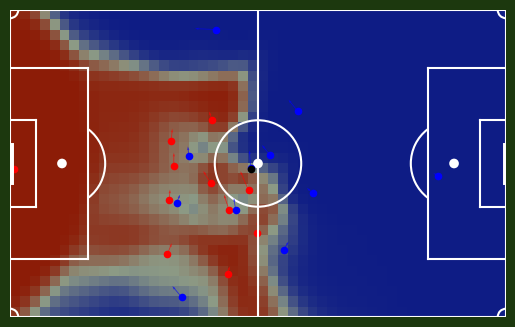

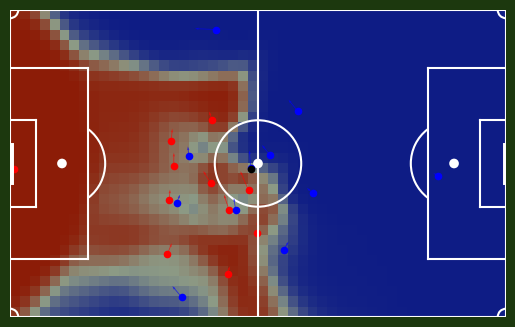

In [9]:
pitch_control.plot_tensor_pitch_control(td_object=td_object, frame=100, version = 'Spearman')

Modelling pitch control...
Running pitch control computation based on Spearman's integration method
Current batch: 1/2
Current batch: 2/2


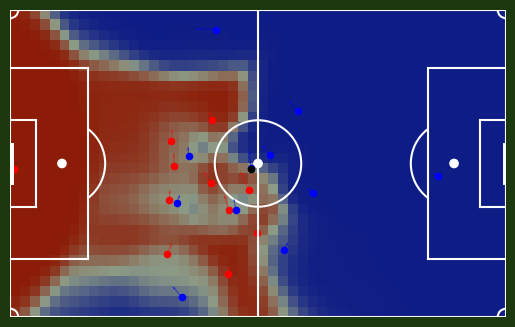

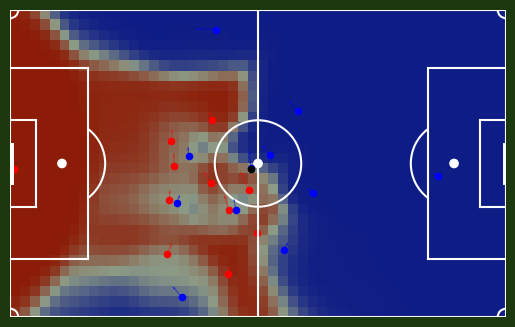

In [10]:
pitch_control.plot_tensor_pitch_control(td_object=td_object, frame=100, version='Spearman', implementation='int')

Modelling pitch control...
Running Spearman's pitch control computation based on Gauss legendre quadration
Current batch: 1/2
Current batch: 2/2


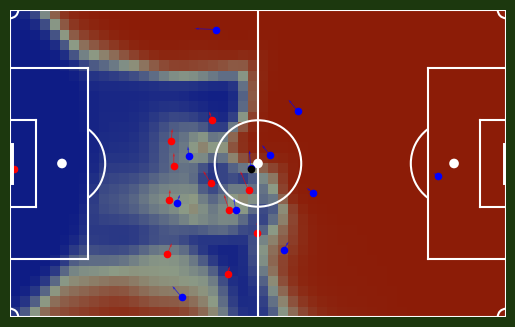

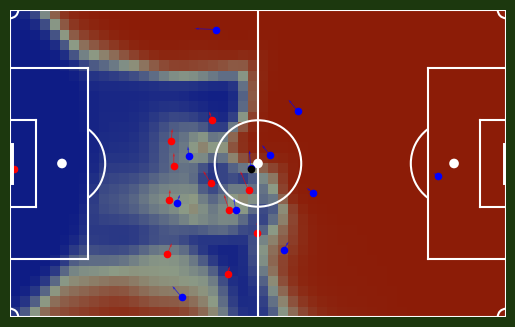

In [11]:
pitch_control.plot_tensor_pitch_control(td_object=td_object, frame=100, team='Away', version = 'Spearman')

Modelling pitch control...
Running pitch control computation based on Spearman's integration method
Current batch: 1/2
Current batch: 2/2


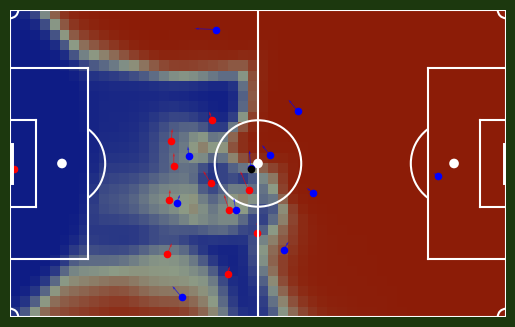

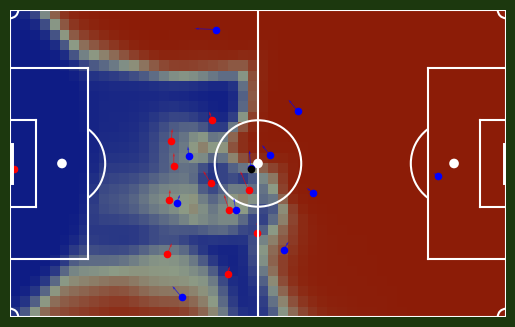

In [12]:
pitch_control.plot_tensor_pitch_control(td_object=td_object, frame=100, team='Away', version='Spearman', implementation='int')